In [3]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
os.chdir(path="/Users/velo1/SynologyDrive/GIT_syno/data/MovieLens _ml-latest-small")
os.getcwd()
links = pd.read_csv("links.csv")
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


<Axes: >

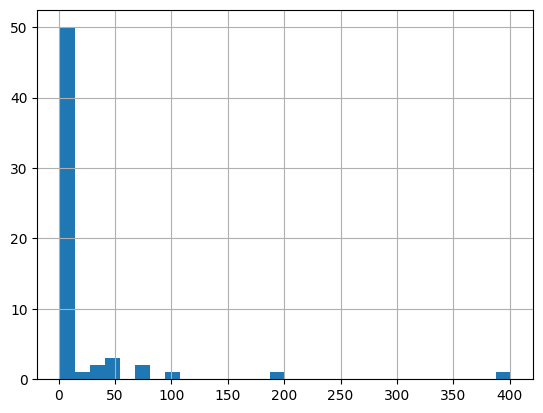

In [6]:
tags.groupby('userId').tag.count().hist(bins=30)

In [7]:
tags.groupby('userId').tag.count().median()

4.0

In [8]:
tags.groupby('userId').tag.count().mean()

21.24590163934426

<Axes: >

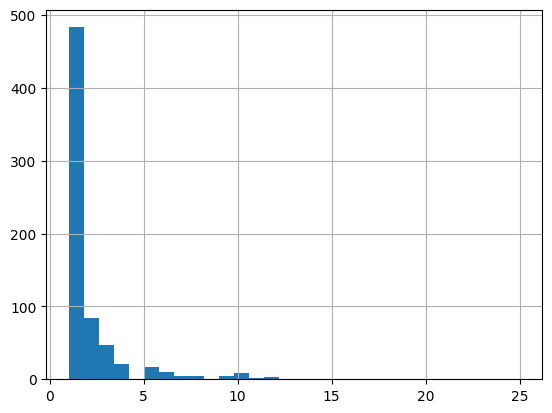

In [9]:
tags.groupby('movieId').tag.count().hist(bins=30)

In [10]:
tags.groupby('movieId').tag.count().mean()

1.8809869375907111

In [11]:
tags.groupby('movieId').tag.count().median()

1.0

In [13]:
year_month = []

for t in (tags.timestamp.values):
    d = datetime.fromtimestamp(t)
    year_month.append(str(d.year) + '-' + str(d.month))

In [14]:
tags['year_month'] = np.array(year_month)

<Axes: xlabel='year_month'>

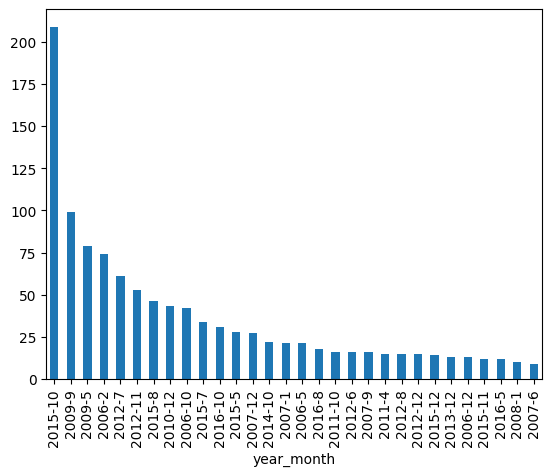

In [15]:
tags.year_month.value_counts()[:30].plot.bar()

<Axes: >

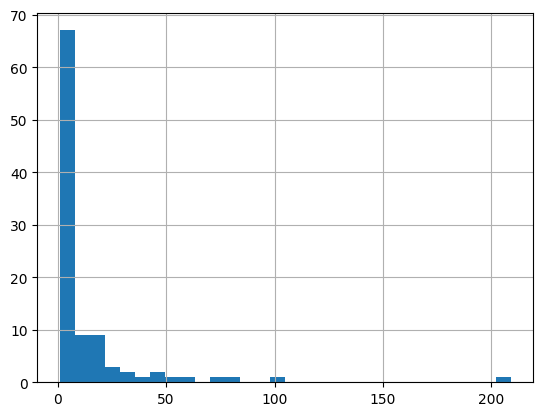

In [16]:
tags.groupby('year_month').tag.count().hist(bins=30)

In [17]:
tags.groupby('year_month').tag.count().mean()

13.090909090909092

In [18]:
tags.groupby('year_month').tag.count().median()

4.0

In [19]:
num_genres_on_movie = [len(g.split('|')) for g in movies.genres.values]

(array([2.793e+03, 3.039e+03, 2.115e+03, 8.520e+02, 2.610e+02, 5.000e+01,
        1.100e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

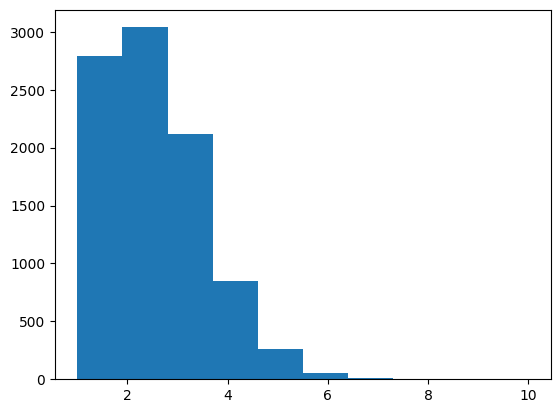

In [20]:
plt.hist(num_genres_on_movie)

In [21]:
np.mean(num_genres_on_movie)

2.2290410958904108

In [22]:
np.median(num_genres_on_movie)

2.0